# Clustering Part 2

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.neighbors import NearestNeighbors
import scipy
import sklearn as sm
import collections
import queue
import scipy.io as spio
import plotly.figure_factory as ff

#DBSCAN Algorithm

DBSCAN(Density-Based Spatial Clustering of Applications with Noise) is a commonly used unsupervised clustering algorithm. DBSCAN does not need to specify the number of clusters. It can automatically detect the number of clusters based on your input data and parameters. More importantly, DBSCAN can find arbitrary shape clusters that k-means are not able to find.

# Algorithm:
a. The algorithm proceeds by arbitrarily picking up a point in the dataset (until all points have been visited).

b. If there are at least ‘minPoint’ points within a radius of ‘ε’ to the point then we consider all these points to be part of the same cluster.

c. The clusters are then expanded by recursively repeating the neighborhood calculation for each neighboring point



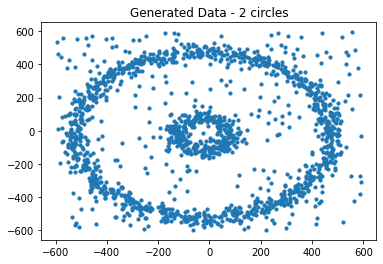

In [2]:
def Circle(r,n):
    """
    Takes radius of the circle and the number of points as the input
    And returns the n data points according
    """
    points = []
    
    for x in range(1,n+1):        
        points.append((math.cos(2*math.pi/n*x)*r+np.random.normal(-25,25),math.sin(2*math.pi/n*x)*r+np.random.normal(-25,25)))
    
    return points

# Creating data points in the form of a circle

#take radius of 500, 100 for 2 circular distributions and generate 1000 and 300 points in each distribution accordingly

#creating a dataframe in pandas and appending the next cluster generations.
df = pd.DataFrame(Circle(500,1000))
df = df.append(Circle(100,300))
df = df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

#plotting
plt.scatter(df[0],df[1],s=10)
plt.title('Generated Data - 2 circles')
plt.show()

A. **Generate "N" spherical training data points.**


B. **Perform DBSCAN Algorithm on the above generated data to obtain clusters**

Set eps = 30, Minpoints = 6


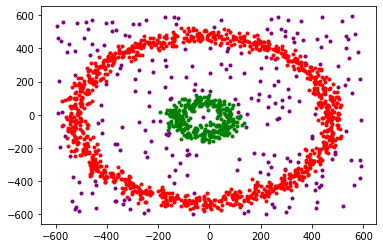

number of cluster found: 2
Counter({1: 1059, 2: 310, 0: 231})
numbrer of outliers found: 231



In [3]:
#Define label for differnt point group
#DBSCAN ALOGORITHM

"""
outliers/unassigned - 0
core points - 1
edges - 2
"""

#assigning labels
NOISE = UNASSIGNED = 0
core=-1
edge=-2


#function to find all neigbor points in radius
def neighbor_points(data, point_index, eps):
    """
    Takes data, point and the epsilon(radius) as input
    and returns all the points within the radius of that to an array
    """
    
    neighbour_points = []
    for i in range(len(data)):
        #Euclidian distance using L2 Norm
        
        if np.linalg.norm(data[i] - data[point_index]) <= eps:
            neighbour_points.append(i)
    return neighbour_points

#DB Scan algorithom
def dbscan(data, Eps, MinPt):
    """
    This part classifies points into the above mentioned 3 categories and
    assigns labels.
    """
    #initilize all pointlable to unassign
    pointlabel  = [UNASSIGNED] * len(data)
    pointcount = []
    
    #initilize null lists for core/noncore point
    corepoint = []
    noncore = []
    
    #Find all neigbor for all point
    for i in range(len(data)):
        pointcount.append(neighbor_points(train,i,Eps))
    
    #Find all core point, edgepoint and noise
    for i in range(len(pointcount)):
        if (len(pointcount[i]) >= MinPt):
            pointlabel[i] = core
            corepoint.append(i)
        else:
            noncore.append(i)

    for i in noncore:
        for j in pointcount[i]:
            if j in corepoint:
                pointlabel[i] = edge

                break
            
    #start assigning point to cluster
    cl = 1
    
    #Using a Queue to put all neigbor core point in queue and find neigboir's neigbor
    for i in range(len(pointlabel)):
        q = queue.Queue()
        if (pointlabel[i] == core):
            pointlabel[i] = cl
            for x in pointcount[i]:
                if(pointlabel[x] == core):
                    q.put(x)
                    pointlabel[x] = cl
                elif(pointlabel[x] == edge):
                    pointlabel[x] = cl
            #Stop when all point in Queue has been checked   
            while not q.empty():
                neighbors = pointcount[q.get()]
                for y in neighbors:
                    if (pointlabel[y] == core):
                        pointlabel[y] = cl
                        q.put(y)
                    if (pointlabel[y] == edge):
                        pointlabel[y] = cl            
            cl = cl+1 #move to next cluster
           
    return pointlabel,cl
    
#Function to plot final result
def plotRes(data, clusterRes, clusterNum):
    
    """
    For plotting purpose.
    """
    nPoints = len(data)
    scatterColors = ['black', 'red', 'green', 'brown', 'blue', 'orange', 'yellow']
    for i in range(clusterNum):
        if (i==0):
            #Plot all noise point as blue
            color = 'purple'
        else:
            color = scatterColors[i % len(scatterColors)]
        x1 = [];  y1 = []
        for j in range(nPoints):
            if clusterRes[j] == i:
                x1.append(data[j, 0])
                y1.append(data[j, 1])
        plt.scatter(x1, y1, c=color, alpha=1, marker='.')


#Load Data
train = np.array(df)

#Set EPS and Minpoint
epss = [30]
minptss = [6]
# Find ALl cluster, outliers in different setting and print resultsw
for eps in epss:
    for minpts in minptss:
        print('Set eps = ' +str(eps)+ ', Minpoints = '+str(minpts))
        pointlabel,cl = dbscan(train,eps,minpts)
        plotRes(train, pointlabel, cl)
        plt.show()
        print('number of cluster found: ' + str(cl-1))
        counter=collections.Counter(pointlabel)
        print(counter)
        outliers  = pointlabel.count(0)
        print('numbrer of outliers found: '+str(outliers) +'\n')

C. **Experiment by varying the number of min points and epsilon radius and plot your observations**

Set eps = 30, Minpoints = 6


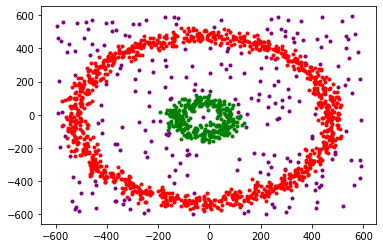

number of cluster found: 2
Counter({1: 1059, 2: 310, 0: 231})
numbrer of outliers found: 231

Set eps = 30, Minpoints = 4


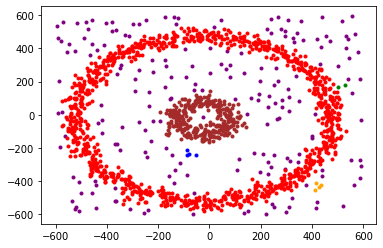

number of cluster found: 5
Counter({1: 1073, 3: 317, 0: 200, 5: 4, 4: 4, 2: 2})
numbrer of outliers found: 200

Set eps = 35, Minpoints = 6


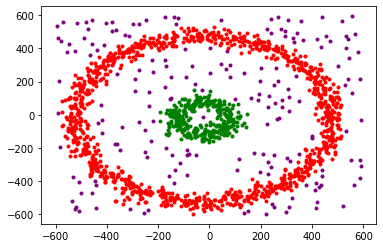

number of cluster found: 2
Counter({1: 1088, 2: 320, 0: 192})
numbrer of outliers found: 192

Set eps = 35, Minpoints = 4


number of cluster found: 5
Counter({1: 1097, 2: 321, 0: 170, 3: 4, 5: 4, 4: 4})
numbrer of outliers found: 170

Set eps = 40, Minpoints = 6


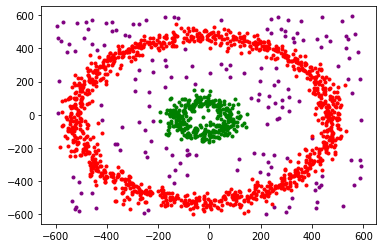

number of cluster found: 2
Counter({1: 1110, 2: 325, 0: 165})
numbrer of outliers found: 165

Set eps = 40, Minpoints = 4


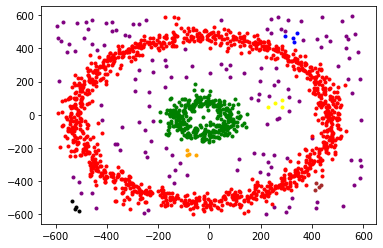

number of cluster found: 7
Counter({1: 1115, 2: 326, 0: 139, 4: 4, 7: 4, 3: 4, 5: 4, 6: 4})
numbrer of outliers found: 139



In [4]:
# varying the number of min points and epsilon radius

#Set EPS and Minpoint
epss = [30, 35, 40]
minptss = [6, 4]
# Find ALl cluster, outliers in different setting and print resultsw
for eps in epss:
    for minpts in minptss:
        print('Set eps = ' +str(eps)+ ', Minpoints = '+str(minpts))
        pointlabel,cl = dbscan(train,eps,minpts)
        plotRes(train, pointlabel, cl)
        plt.show()
        print('number of cluster found: ' + str(cl-1))
        counter=collections.Counter(pointlabel)
        print(counter)
        outliers  = pointlabel.count(0)
        print('numbrer of outliers found: '+str(outliers) +'\n')

D. **Compare your model with the built in DBSCAN in Sci-kit Learn. Also compare you results with GMM and the K-means Algorithm**

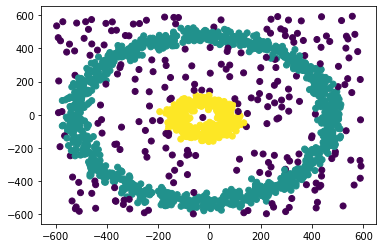

In [5]:
#built in DBSCAN

data = np.array(df)
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 30,min_samples=6).fit(data)
labels = dbscan.labels_
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.show()

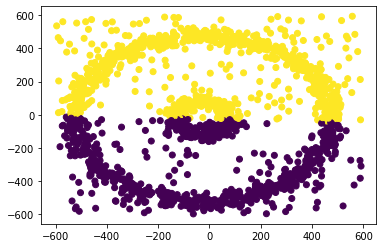

In [6]:
#built in Kmeans

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(data)
y = kmeans.fit_predict(data)
lbl = kmeans.predict(data)
plt.scatter(data[:,0],data[:,1],c=lbl)
plt.show()

In [7]:
#built in GMM


from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0).fit(data)
labels = gm.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.show()

# **Fuzzy C-Means Based clustering**

1. Randomly initialize the centroids and clusters K, and compute the probability that each data point xi is a member of a given cluster k, P(point xi has label k|xi, k).

2. Iteration: Recalculate the centroids of the clusters as the weighted centroid given the probabilities of membership of all data points xi:

$$
\mu_k(n+1)=\frac{\sum_{x_i \in k} x_i * P\left(\mu_k \mid x_i\right)^b}{\sum_{x_i \in k} P\left(\mu_k \mid x_i\right)^b}
$$


3. Implement it on the data for which Kmeans was implemented. 

In [8]:
#Generate 2D gaussian data

#fixing random values
np.random.seed(42)

#defining function to generate data
def gaussian_2d(mu1, mu2, sigma):
    x = np.random.normal(mu1, sigma, 100)
    y = np.random.normal(mu2, sigma, 100)
    return (x, y)

#getting data
x1, y1 = gaussian_2d(0.5, 0, 1)
x2, y2 = gaussian_2d(5, 5, 1)
x3, y3 = gaussian_2d(5, 10, 1)
x4, y4 = gaussian_2d(10, 1.5, 1)

#plotting data
plt.title("2D gaussian multivariate data generation")
plt.scatter(x1,y1, marker='+', s=20)
plt.scatter(x2,y2, marker='.', s=20)
plt.scatter(x3,y3, marker='o', s=20)
plt.scatter(x4,y4, marker='*', s=20)

size = np.shape(x1)[0] + np.shape(x2)[0] +np.shape(x3)[0] +np.shape(x4)[0]

print('Number of Data Points :', size)

Number of Data Points : 400


In [9]:
data_x = np.concatenate((x1, x2, x3, x4))
data_y = np.concatenate((y1, y2, y3, y4))

plt.scatter(data_x, data_y, s=15)

plt.title("Data without clustering")
print('Number of Data Points :', np.shape(data_x))

Number of Data Points : (400,)


[10.593101257968383, 0.4189434595917376]
[4.400624977046228, 11.90941664047013]
[5.686051459998439, 10.048084946661382]
[5.51503526720866, 6.2776648957884245]


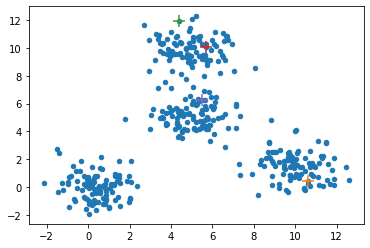

In [10]:
#initialize cluster centers

#selecting random vectors as cluster means and setting the value of seed
np.random.seed(6)

clusterMeans = np.random.randint(400, size=4)

for i in range(4):
    clusterMeans[i] = int(clusterMeans[i])

mu1 = [data_x[clusterMeans[0]], data_y[clusterMeans[0]]]
mu2 = [data_x[clusterMeans[1]], data_y[clusterMeans[1]]]
mu3 = [data_x[clusterMeans[2]], data_y[clusterMeans[2]]]
mu4 = [data_x[clusterMeans[3]], data_y[clusterMeans[3]]]

means = [mu1, mu2, mu3, mu4]

print(mu1)
print(mu2)
print(mu3)
print(mu4)

plt.scatter(data_x, data_y, marker='o', s=20)
plt.scatter(mu1[0], mu1[1], marker='+', s=125)
plt.scatter(mu2[0], mu2[1], marker='+', s=125)
plt.scatter(mu3[0], mu3[1], marker='+', s=125)
plt.scatter(mu4[0], mu4[1], marker='+', s=125)

data_fuzzyc = np.vstack((data_x, data_y))

In [11]:
#Changing the data into (400, 2) shape
data_fuzzyc = data_fuzzyc.T

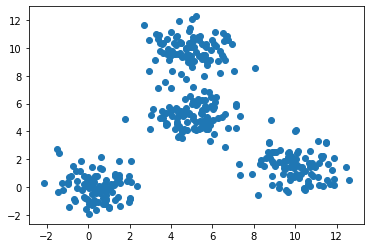

In [12]:
plt.scatter(data_fuzzyc[:,0], data_fuzzyc[:,1])

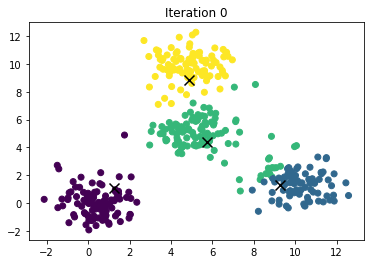

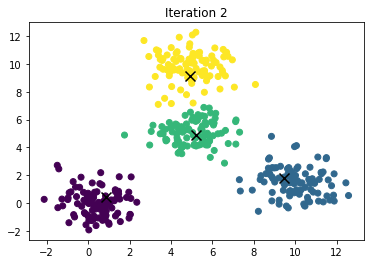

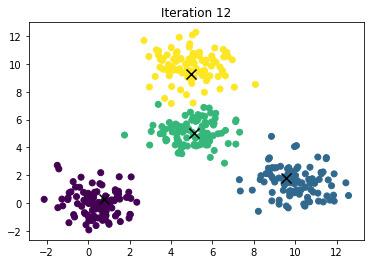

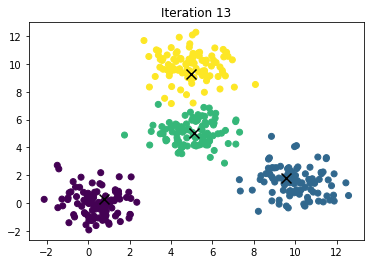

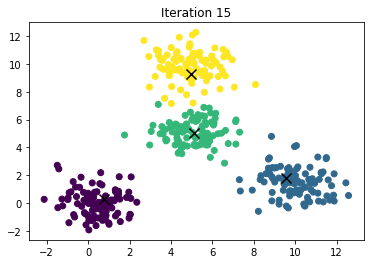

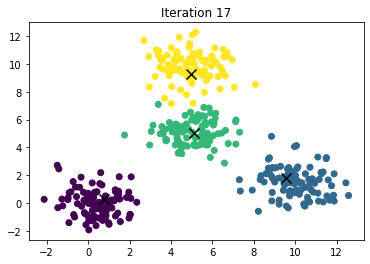

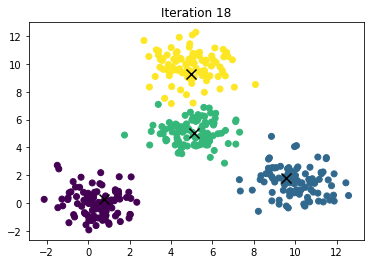

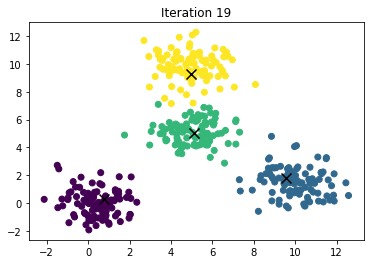

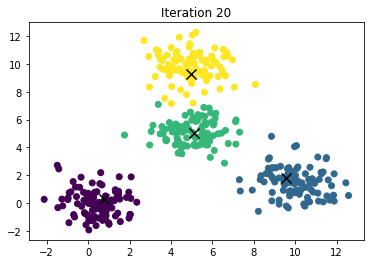

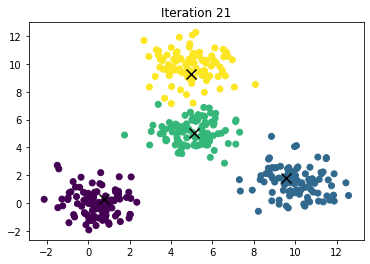

final clustering


In [13]:
#Fuzzy C-means implementation

class FuzzyC():
    # works for only 2D
    """ TODO :
        1 ) first find c centers randomly and calc dist matr and membership matr
        2 ) find new centers
        3 ) find dist matrix
        4 ) find new membership matrix
        5) Do it till convergence
    """
    def __init__(self, n_clusters, data):
        self.n = data.shape[0]
        self.num_clusters = n_clusters
        self.data = data
        self.mu = np.random.uniform(np.min(data), np.max(data), (n_clusters, 2))
        self.distMatrix = np.zeros((self.n, n_clusters))
        self.c = np.zeros((self.n, n_clusters))
        self.loss = []

    def updateDist(self):
        
        """
        Updates the distance matrix after each iteration :  NXN matrix for N data points.
        """
        for i in range(self.n):
            for j in range(self.num_clusters):
                self.distMatrix[i][j] = np.linalg.norm(self.data[i] - self.mu[j])

    def updateC(self):
        """
        Associtivity coefficients calculations : KXN matrix
        """
        for i in range(self.n):
            for j in range(self.num_clusters):
                sum = 0
                for k in range(self.num_clusters):
                    sum += self.distMatrix[i][j]*2 / self.distMatrix[i][k]*2
                self.c[i][j] = 1 / sum

    def updateMu(self):
        """
        Calculate new means according to the associativity and means of the cluster
        """
        for i in range(self.num_clusters):
            sum = [0,0]
            for j in range(self.n):
                sum += self.c[j][i]**2 * self.data[j]
            self.mu[i] = sum / np.sum(self.c[:, i]**2)

    def plotClusters(self, title):
        plt.scatter(self.data[:, 0], self.data[:, 1], c=np.argmax(self.c, axis=1))
        plt.scatter(self.mu[:, 0], self.mu[:, 1], c='black', s=100, marker='x')
        plt.title(title)
        plt.show()

    def LossEstimation(self):
        loss = 0
        for i in range(self.n):
            for j in range(self.num_clusters):
                loss += self.c[i][j]*2 * self.distMatrix[i][j]*2
        self.loss.append(loss)

    def plotLoss(self):
        plt.plot(self.loss)
        plt.title("Loss")
        plt.xlabel("Iterations")
        plt.show()

    def fit(self):
        self.updateDist()
        self.updateC()
        self.LossEstimation()
        self.plotClusters("Initial")
        i = 0
        while True:
            self.updateDist()
            self.updateC()
            self.updateMu()
            self.LossEstimation()
            self.plotClusters(f"Iteration {i}")
            i += 1
            if self.loss[-2] - self.loss[-1] < 1e-5 and i > 5:
                break
    
fcm = FuzzyC(4, data_fuzzyc)
fcm.fit()
print("final clustering")
fcm.plotClusters("Final Clustering")
fcm.plotLoss()

# Hierarchical Clustering

Hierarchical clustering is an unsupervised clustering technique which groups together the unlabelled data of similar characteristics.

There are two types of hierarchical clustering:


*   Agglomerative Clustering
*   Divisive Clustering

**Agglomerative Clustering:** 

 In this type of hierarchical clustering all data set are considered as indivisual cluster and at every iterations clusters with similar characteristics are merged to give bigger clusters. This is repeated untill one single cluster is reached. It is also called bottem-top approach.



## Agglomerative Clustering:

Lets start with some dummy example :

X=$[x_1,x_2,...,x_5]$, with

$x_1=\begin{bmatrix} 1\\1\end{bmatrix}$, $x_2=\begin{bmatrix} 2\\1\end{bmatrix}$, $x_3=\begin{bmatrix} 5\\4\end{bmatrix}$, $x_4=\begin{bmatrix} 6\\5\end{bmatrix}$, $x_5=\begin{bmatrix} 6.5\\6\end{bmatrix}$

**Steps to perform Agglomerative Clustering:**





1.   Compute Distance matrix ($N \times N$ matrix, where $N$ number of vectors present in the dataset):
$D(a,b)=||x_{a}-x_{b}||_{2}$
2.   Replace the diagonal elements with $inf$ and find the index of the minimum element present in the distance matrix (suppose we get the location $(l,k)$).
3. Replace $x_{min(l,k)}=.5\times[x_{l}+x_{m}]$ and delete $x_{max(l,m)}$ vector from $X$(i.e now $(N=N-1)$), 

**repeat from step 1 again untill all the vectors combined to a single cluster.**





In [14]:
#functions

def Euclidian_Dist(x,y):
    #caluclate the euclidean distance
    return np.linalg.norm(x-y)

def Dist_mat(X):
    #find NXN matrix of distances for N data points
    
    dist_mat = np.zeros((X.shape[1],X.shape[1]))
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            dist_mat[i][j] = round(Euclidian_Dist(X[:,i],X[:,j]),1)
    return dist_mat

def combine(X):
    #clustering algorithm
    
    D_mat = Dist_mat(X)
    maxPossVal =np.inf
    
    #set all zeros to infinity value
    D_mat[(D_mat==0)]=maxPossVal
    print(D_mat)
    
    #find minimum points in each row
    minArr = np.min(D_mat, axis=0)
    
    #find index where the array location is minimum
    loc=np.argwhere(D_mat == np.min(minArr))
    loc=loc[0,:]
    
    print('Vector of X to be combined: ', loc+1)

    cluster_comb.append(loc+1)

    retained = X
    retained = np.delete(retained,max(loc),1)
    retained[:,min(loc)] = 0.5*(X[:,loc[0]]+X[:,loc[1]])


    newX = retained
    #print(newX)

    return newX

In [15]:
X=np.array([[1,1],[2,1],[5,4],[6,5],[6.5,6]])
X=X.transpose()

cluster_comb=[]
X1=X
print(X)
while X1.shape!=(2,1):
    X1 = combine(X1)
    print('\nMean of clusters after every iteration: \n\n',X1)

print('\ncluster combination order: \n\n',cluster_comb)


lab = np.linspace(1,X.shape[1],X.shape[1])
fig = ff.create_dendrogram(X.T, labels = lab)
fig.update_layout(width = 800, height = 300)
fig.show()

[[1.  2.  5.  6.  6.5]
 [1.  1.  4.  5.  6. ]]
[[inf 1.  5.  6.4 7.4]
 [1.  inf 4.2 5.7 6.7]
 [5.  4.2 inf 1.4 2.5]
 [6.4 5.7 1.4 inf 1.1]
 [7.4 6.7 2.5 1.1 inf]]
Vector of X to be combined:  [1 2]

Mean of clusters after every iteration: 

 [[1.5 5.  6.  6.5]
 [1.  4.  5.  6. ]]
[[inf 4.6 6.  7.1]
 [4.6 inf 1.4 2.5]
 [6.  1.4 inf 1.1]
 [7.1 2.5 1.1 inf]]
Vector of X to be combined:  [3 4]

Mean of clusters after every iteration: 

 [[1.5  5.   6.25]
 [1.   4.   5.5 ]]
[[inf 4.6 6.5]
 [4.6 inf 2. ]
 [6.5 2.  inf]]
Vector of X to be combined:  [2 3]

Mean of clusters after every iteration: 

 [[1.5   5.625]
 [1.    4.75 ]]
[[inf 5.6]
 [5.6 inf]]
Vector of X to be combined:  [1 2]

Mean of clusters after every iteration: 

 [[3.5625]
 [2.875 ]]

cluster combination order: 

 [array([1, 2], dtype=int64), array([3, 4], dtype=int64), array([2, 3], dtype=int64), array([1, 2], dtype=int64)]


# Clustering Algorithms on MNIST Digit dataset

Perform Kmeans and gmm clustering on MNIST dataset 


1. Load MNIST data from the given images and labels
2. Consider any 2 classes

(1902, 784)
(1902,)
(1902, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


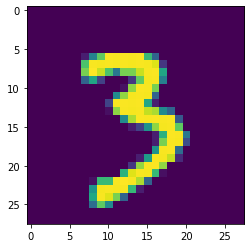

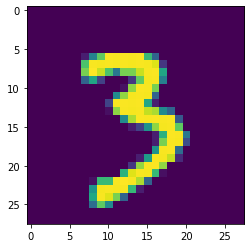

In [16]:
import numpy as np
import matplotlib.pyplot as plt 

file1='t10k-images-idx3-ubyte'
file2='t10k-labels-idx1-ubyte'

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

cl=[3,5]

id_1=np.where(labels==cl[0])
id1=id_1[0]
#id1=id1[:50]
Im_1=Images[id1,:,:]
lab_1=labels[id1]


id_5=np.where(labels==cl[1])
id5=id_5[0]

Im_5=Images[id5,:,:]
lab_5=labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])

data=np.concatenate((Im_1,Im_5))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_1,lab_5))
print(G_lab.shape)



print(data.shape)

d=data[1,:]
im=np.reshape(d,(28,28))
plt.figure()
plt.imshow(im)
print(data)

Use the K-means clustering algorithm from the last lab to form the clusters

In [17]:
## write your code here
# k-means

def K_means_clustering(data,K,itr,eps):
    # random initialization of clusters
    idx=np.random.randint(0,data.shape[0],K)
    Cents=data[idx,:]


    # initialized a array to store distance, assigned label, minimum distance
    DAL=np.zeros((data.shape[0],K+2))
    error=[]
    F=data+10**(-20)   # added a small value as it is a sparse matrix(many values are zero)
  


    for n in range(itr):
        # assignment stage
        for i in range(F.shape[0]):
            for j in range(K):
                DAL[i,j]=np.linalg.norm(F[i,:]-Cents[j,:])


            Dist=np.min(DAL[i,:K])

            ind=((np.where(Dist==DAL[i,:K])[0]))

            DAL[i,K]=ind.astype('int')
            DAL[i,K+1]=Dist

        # re-estimation stage
        for i in range(K):
            ind=np.where(DAL[:,K]==i)

        if (F[ind,:][0].shape[0])==0:
            id1=np.random.randint(0,data.shape[0],1)
            Cents[i,:]=F[id1,:]
        else:
            Cents[i,:]=np.mean(F[ind,:][0],axis=0)

        error.append(np.mean(DAL[:,K+1]))  

        if n>2:
            if abs(error[n]-error[n-1])<eps:
                break
    return DAL, Cents,error

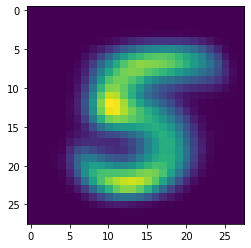

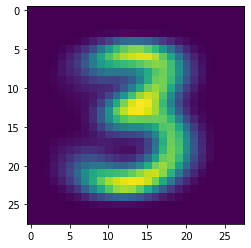

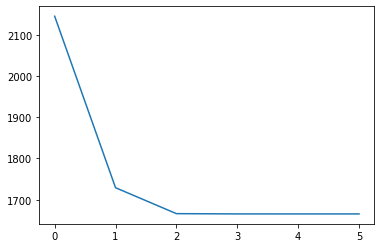

In [18]:
DAL,cents,error = K_means_clustering(Im_5,2,200,10**(-20))

plt.imshow(np.reshape(cents[0,:],(28,28)))
plt.figure()
plt.imshow(np.reshape(cents[1,:],(28,28)))

plt.figure()
plt.plot(error)
plt.show()

DAL,cents,error = K_means_clustering(Im_1,2,200,10**(-20))

plt.imshow(np.reshape(cents[0,:],(28,28)))
plt.figure()
plt.imshow(np.reshape(cents[1,:],(28,28)))

plt.figure()
plt.plot(error)
plt.show()

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,n_init=100,max_iter=100,verbose=1)
kmeans.fit(data)

Initialization complete
Iteration 0, inertia 9509788203.0
Iteration 1, inertia 5558036527.684358
Iteration 2, inertia 5517935092.915115
Iteration 3, inertia 5490208036.545283
Iteration 4, inertia 5471669531.265766
Iteration 5, inertia 5454883088.796143
Iteration 6, inertia 5445922060.538277
Iteration 7, inertia 5440048306.581327
Iteration 8, inertia 5434091104.599524
Iteration 9, inertia 5430334766.233263
Iteration 10, inertia 5426248696.1850815
Iteration 11, inertia 5424079135.408717
Iteration 12, inertia 5422103386.36363
Iteration 13, inertia 5419563927.787906
Iteration 14, inertia 5416619771.60236
Iteration 15, inertia 5415424435.159316
Iteration 16, inertia 5415012323.073876
Iteration 17, inertia 5414821344.544361
Iteration 18, inertia 5414751761.333747
Iteration 19, inertia 5414681279.100541
Iteration 20, inertia 5414638185.097303
Iteration 21, inertia 5414619525.11322
Converged at iteration 21: strict convergence.
Initialization complete
Iteration 0, inertia 12365385529.0
Iterati

Iteration 9, inertia 5415025141.461831
Iteration 10, inertia 5414659118.333886
Iteration 11, inertia 5414614851.440308
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 10432558913.0
Iteration 1, inertia 5541843434.777117
Iteration 2, inertia 5498418977.018278
Iteration 3, inertia 5478904132.297397
Iteration 4, inertia 5456514675.005482
Iteration 5, inertia 5438903985.865952
Iteration 6, inertia 5428594325.710419
Iteration 7, inertia 5421383503.990436
Iteration 8, inertia 5418008494.747904
Iteration 9, inertia 5416478051.951048
Iteration 10, inertia 5415224286.520668
Iteration 11, inertia 5414713963.855232
Iteration 12, inertia 5414636974.792227
Iteration 13, inertia 5414614851.440308
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 9756088847.0
Iteration 1, inertia 5638673958.826867
Iteration 2, inertia 5563886929.820901
Iteration 3, inertia 5508566566.170331
Iteration 4, inertia 5472621486.152351
Ite

Iteration 1, inertia 5610990487.546902
Iteration 2, inertia 5554827318.916375
Iteration 3, inertia 5492072918.66445
Iteration 4, inertia 5448220156.43521
Iteration 5, inertia 5426401402.281379
Iteration 6, inertia 5419107340.473308
Iteration 7, inertia 5416359932.4872
Iteration 8, inertia 5415224512.026498
Iteration 9, inertia 5414892643.670969
Iteration 10, inertia 5414712782.325474
Iteration 11, inertia 5414641989.459541
Iteration 12, inertia 5414624397.634571
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 10697601511.0
Iteration 1, inertia 5585903192.290547
Iteration 2, inertia 5524174482.522444
Iteration 3, inertia 5489961844.262793
Iteration 4, inertia 5468534941.758702
Iteration 5, inertia 5453158623.692487
Iteration 6, inertia 5444742286.752979
Iteration 7, inertia 5437776469.540018
Iteration 8, inertia 5433488878.568362
Iteration 9, inertia 5429306897.300458
Iteration 10, inertia 5425966314.213362
Iteration 11, inertia 5423929825.030

Iteration 0, inertia 9637073569.0
Iteration 1, inertia 5586731950.376179
Iteration 2, inertia 5525426251.839679
Iteration 3, inertia 5474057859.912916
Iteration 4, inertia 5453729585.542928
Iteration 5, inertia 5443103809.532291
Iteration 6, inertia 5435806939.963959
Iteration 7, inertia 5431055641.264946
Iteration 8, inertia 5427395906.591188
Iteration 9, inertia 5424631673.771251
Iteration 10, inertia 5422652046.300071
Iteration 11, inertia 5420093028.866193
Iteration 12, inertia 5417017597.074736
Iteration 13, inertia 5415508986.342747
Iteration 14, inertia 5415101780.646178
Iteration 15, inertia 5414869779.913045
Iteration 16, inertia 5414769439.674526
Iteration 17, inertia 5414681279.100541
Iteration 18, inertia 5414638185.097303
Iteration 19, inertia 5414619525.11322
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 9196996625.0
Iteration 1, inertia 5632961041.944465
Iteration 2, inertia 5615113628.380074
Iteration 3, inertia 5600308171.4

Iteration 2, inertia 5570533556.450287
Iteration 3, inertia 5552400431.722557
Iteration 4, inertia 5533356630.508978
Iteration 5, inertia 5512340114.810194
Iteration 6, inertia 5496034102.964586
Iteration 7, inertia 5481196272.272057
Iteration 8, inertia 5460738281.8607435
Iteration 9, inertia 5442250667.678555
Iteration 10, inertia 5429862680.323546
Iteration 11, inertia 5423486772.859053
Iteration 12, inertia 5419466248.793507
Iteration 13, inertia 5416894450.280507
Iteration 14, inertia 5415280005.528773
Iteration 15, inertia 5414707904.008005
Iteration 16, inertia 5414636974.792227
Iteration 17, inertia 5414614851.440308
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 9285884342.0
Iteration 1, inertia 5445657230.001726
Iteration 2, inertia 5420848696.103372
Iteration 3, inertia 5416902184.799415
Iteration 4, inertia 5415371029.295382
Iteration 5, inertia 5414737927.652465
Iteration 6, inertia 5414633320.69333
Iteration 7, inertia 54146148

Iteration 0, inertia 9515165959.0
Iteration 1, inertia 5624679901.624319
Iteration 2, inertia 5597280495.962206
Iteration 3, inertia 5572529916.787504
Iteration 4, inertia 5538550823.12455
Iteration 5, inertia 5492442322.412768
Iteration 6, inertia 5441996525.821022
Iteration 7, inertia 5424722481.188939
Iteration 8, inertia 5417612204.510644
Iteration 9, inertia 5415340303.024397
Iteration 10, inertia 5414719274.683032
Iteration 11, inertia 5414625256.632615
Iteration 12, inertia 5414614851.440308
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 10027477962.0
Iteration 1, inertia 5688297166.022963
Iteration 2, inertia 5584841139.285772
Iteration 3, inertia 5545641452.1229515
Iteration 4, inertia 5521415588.294706
Iteration 5, inertia 5502994391.727216
Iteration 6, inertia 5488564666.4197035
Iteration 7, inertia 5470546487.986761
Iteration 8, inertia 5448499711.621476
Iteration 9, inertia 5433583249.44758
Iteration 10, inertia 5424387308.71768

Iteration 2, inertia 5556649510.021767
Iteration 3, inertia 5531816214.985978
Iteration 4, inertia 5507757748.628493
Iteration 5, inertia 5488237130.399023
Iteration 6, inertia 5467153179.094463
Iteration 7, inertia 5445404117.206066
Iteration 8, inertia 5431584007.491574
Iteration 9, inertia 5423840364.912809
Iteration 10, inertia 5419466248.793507
Iteration 11, inertia 5416894450.280507
Iteration 12, inertia 5415280005.528773
Iteration 13, inertia 5414707904.008005
Iteration 14, inertia 5414636974.792227
Iteration 15, inertia 5414614851.440308
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 9326316841.0
Iteration 1, inertia 5483826273.248982
Iteration 2, inertia 5436859451.077371
Iteration 3, inertia 5424900742.754392
Iteration 4, inertia 5420270810.114356
Iteration 5, inertia 5417187831.318437
Iteration 6, inertia 5415521169.119804
Iteration 7, inertia 5414821498.162874
Iteration 8, inertia 5414638253.912316
Iteration 9, inertia 5414626415

KMeans(max_iter=100, n_clusters=2, n_init=100, verbose=1)

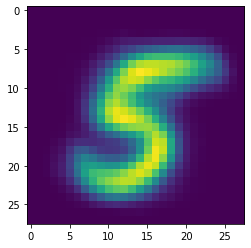

In [20]:
cents=kmeans.cluster_centers_
im=np.reshape(cents[0,:],(28,28))
plt.figure()
plt.imshow(im)

im=np.reshape(cents[1,:],(28,28))
plt.figure()
plt.imshow(im)

Use the GMM clustering algorithm from the last lab to form the clusters

In [21]:
from sklearn.mixture import GaussianMixture as Gmm

gmm=Gmm(n_components=2, init_params='kmeans',covariance_type='diag',verbose=1)
gmm.fit(data)

Initialization 0
  Iteration 10
Initialization converged: True


GaussianMixture(covariance_type='diag', n_components=2, verbose=1)

In [22]:
means=gmm.means_
vars=gmm.covariances_
weights=gmm.weights_

im=np.reshape(means[0,:],(28,28))
plt.figure()
plt.imshow(im)

im=np.reshape(means[1,:],(28,28))
plt.figure()
plt.imshow(im)

In [23]:
gmm.means_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])